![Story of Sneaker Shoes](meta-data/cover-image.png)

# Summary of Analysis Results
<br></br>
**1.  Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

After analyzing the data, I found that the data distribution is right-skewed. Due to the presence of some large order values, data distribution is no longer normal. This results in a significant difference in mean, median, and mode values. In addition, the mean value is not a true representative of the central tendency of data. Therefore, the metric of average order value (AOV) is misleading as it uses the mean value to measure the average dollar amount spent each time a customer places an order.
<br></br>

**2. What metric would you report for this dataset?**

I would use the median metric for this dataset.
<br></br>

**3.  What is its value?**

284.0

# My thought process during this investigation

### I followed the below steps programmatically to analyze the data.

1. Reading data from the given CSV file and calculating the preliminary AOV value.
2. Understanding the data structure by observing features (columns) and corresponding data types.
3. Evaluating if the data has some missing or invalid data points.
4. Understanding the quartiles of data distribution and observing mean, median, minimum, and maximum values.
5. Visualizing the data distribution using histogram and violin plots.
6. As I observe that the data distribution is right-skewed from step 3, I performed a log transformation of the orders data for better visualization of data distribution and the values of mean, median, and mode.
7. After performing step 4, it is clearly evident that the median is a better metric than the mean (AOV) value. Therefore, I decide to use the median metric for the given dataset and compute its value.

# Investigation process using programming

In [10]:
# Importing required libraries and packages

# For basic operations
import pandas as pd
import numpy as np
from pandas import plotting
from scipy import stats

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sbn

# To avoid warnings while plottting results
import warnings
warnings.filterwarnings('ignore')

# Step 1:  Reading data and calculating preliminary AOV value

In [11]:
# Reading data from the provided CSV file
DF_data = pd.read_csv("./2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

# Calculating the average order value (AOV) naively
print("\n******************** AOV value ********************\n", round(sum(DF_data["order_amount"])/len(DF_data["order_amount"]),2))


******************** AOV value ********************
 3145.13


# Step 2: Understanding features and corresponding data types

In [12]:
print("\n******************** Data Structure ********************\n",DF_data.head())

print("\n******************** Data Types ********************\n")
DF_data.dtypes


******************** Data Structure ********************
    order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  

******************** Data Types ********************



order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

# Step 3: Evaluating if the data has some missing or invalid data points

In [13]:
print("******************** Does the data has any NaN values? ********************\n", DF_data.isnull().any().any())

******************** Does the data has any NaN values? ********************
 False


# Step 4: Understanding the quartiles of data distribution and other metrics

In [14]:
DF_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### We observe from the above results that there is a significant difference between the mean and median (2nd quartile - 50%). This results in the right-skewed data distribution. We validate the same by visualizing the data.

# Step 5: Visualizing the data distribution using histogram and violin plots

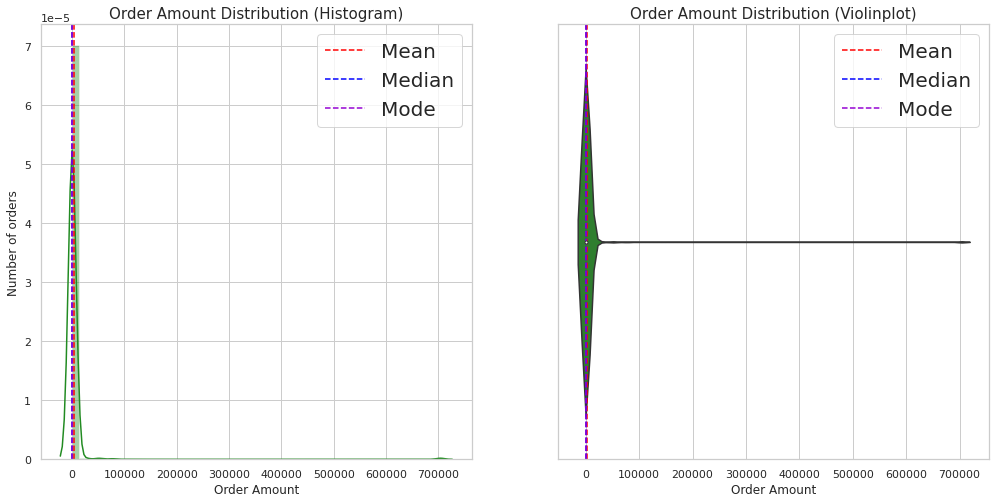

In [15]:
plt.rcParams['figure.figsize'] = (17,8)

plt.subplot(1,2,1)
sbn.set(style='whitegrid')
sbn.distplot(DF_data['order_amount'], color='forestgreen')
plt.title("Order Amount Distribution (Histogram)", fontsize = 15)
plt.axvline(x=np.mean(DF_data['order_amount']), color='red', ls="--", label="Mean")
plt.axvline(x=np.median(DF_data['order_amount']), color='blue', ls="--", label="Median")
plt.axvline(x=stats.mode(DF_data['order_amount'])[0], color='darkviolet', ls="--", label="Mode")
plt.xlabel("Order Amount")
plt.ylabel("Number of orders")
plt.legend(loc=1, prop={'size': 20})

plt.subplot(1,2,2)
sbn.set(style='whitegrid')
sbn.violinplot(DF_data['order_amount'],color='forestgreen')
plt.title("Order Amount Distribution (Violinplot)", fontsize = 15)
plt.axvline(x=np.mean(DF_data['order_amount']), color='red', ls="--", label="Mean")
plt.axvline(x=np.median(DF_data['order_amount']), color='blue', ls="--", label="Median")
plt.axvline(x=stats.mode(DF_data['order_amount'])[0], color='darkviolet', ls="--", label="Mode")
plt.xlabel("Order Amount")
plt.legend(loc=1, prop={'size': 20})

### Following my intuition, the data distribution is skewed. To better visualize this skewed data, I will perform the log transformation of the data.

# Step 6: Performing log transformation for visualizing the skewed data

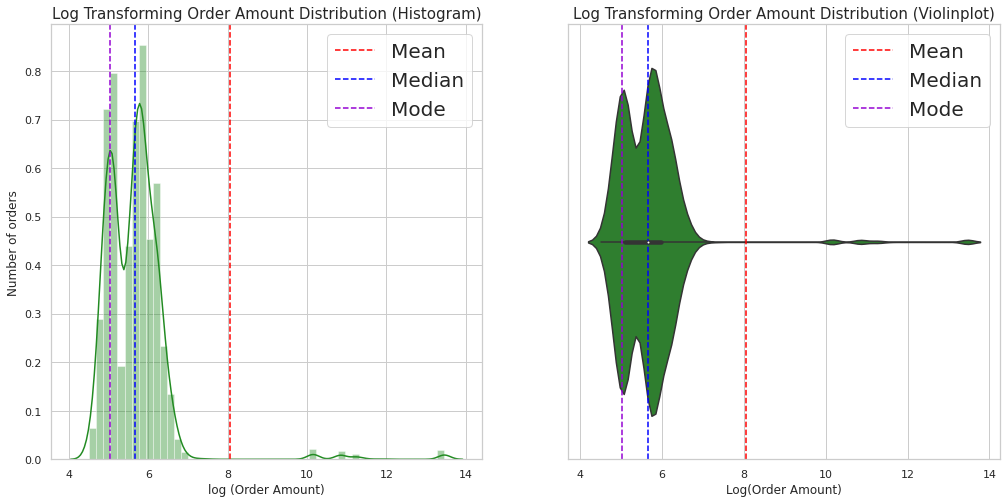

In [16]:
plt.subplot(1,2,1)
sbn.set(style='whitegrid')
sbn.distplot(np.log(DF_data['order_amount']), color='forestgreen')
plt.title("Log Transforming Order Amount Distribution (Histogram)", fontsize = 15)
plt.axvline(x=np.log(np.mean(DF_data['order_amount'])), color='red', ls="--", label="Mean")
plt.axvline(x=np.log(np.median(DF_data['order_amount'])), color='blue', ls="--", label="Median")
plt.axvline(x=np.log(stats.mode(DF_data['order_amount'])[0]), color='darkviolet', ls="--", label="Mode")
plt.xlabel("log (Order Amount)")
plt.ylabel("Number of orders")
plt.legend(loc=1, prop={'size': 20})

plt.subplot(1,2,2)
sbn.set(style='whitegrid')
sbn.violinplot(x=np.log(DF_data['order_amount']),color='forestgreen')
plt.title("Log Transforming Order Amount Distribution (Violinplot)", fontsize = 15)
plt.axvline(x=np.log(np.mean(DF_data['order_amount'])), color='red', ls="--", label="Mean")
plt.axvline(x=np.log(np.median(DF_data['order_amount'])), color='blue', ls="--", label="Median")
plt.axvline(x=np.log(stats.mode(DF_data['order_amount'])[0]), color='darkviolet', ls="--", label="Mode")
plt.xlabel("Log(Order Amount)")
plt.legend(loc=1, prop={'size': 20})

### We observe from the above results that the data distribution is right-skewed. Moreover, there is a significant difference in the values of mean, median, and mode.

# Step 7: Finally, I decide to use median metric and compute its value.

In [17]:
print("I will use the {} metric for the  given dataset and its value is {}".format("median", np.median(DF_data['order_amount'])))

I will use the median metric for the  given dataset and its value is 284.0
